## Load and display basic information

In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('covid_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

C:\Users\user\AppData\Local\Temp\ipykernel_19072\3605535210.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('covid_data.csv')


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

## Data cleaning

In [4]:
print(df.isnull().sum())

# Drop rows with missing values in critical columns like 'total_cases' and 'total_deaths'
df_cleaned = df.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing values for other columns
df_cleaned = df_cleaned.copy()
df_cleaned['new_cases'] = df_cleaned['new_cases'].fillna(0)
df_cleaned['new_deaths'] = df_cleaned['new_deaths'].fillna(0)


iso_code                                        0
continent                                   19669
location                                        0
date                                            0
total_cases                                 39239
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       396468
excess_mortality_cumulative                396468
excess_mortality                           396468
excess_mortality_cumulative_per_million    396468
Length: 67, dtype: int64


## Exploratory Data analysis EDA

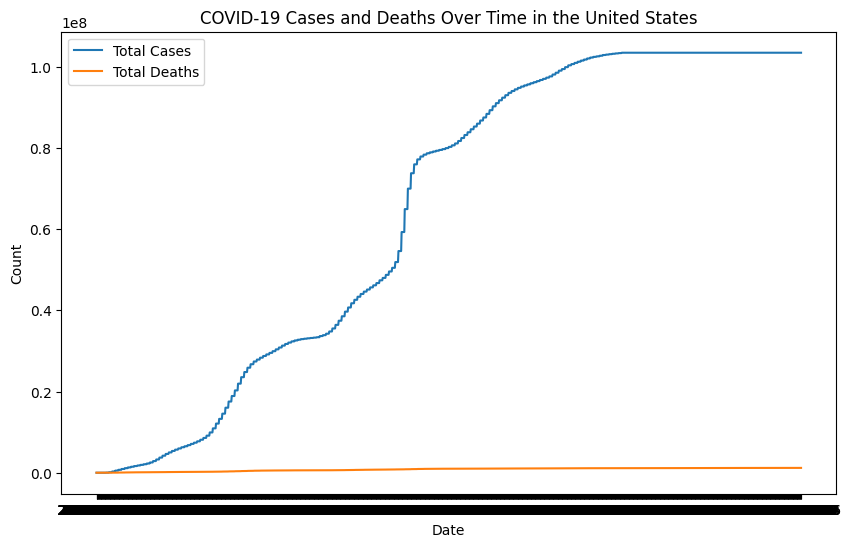

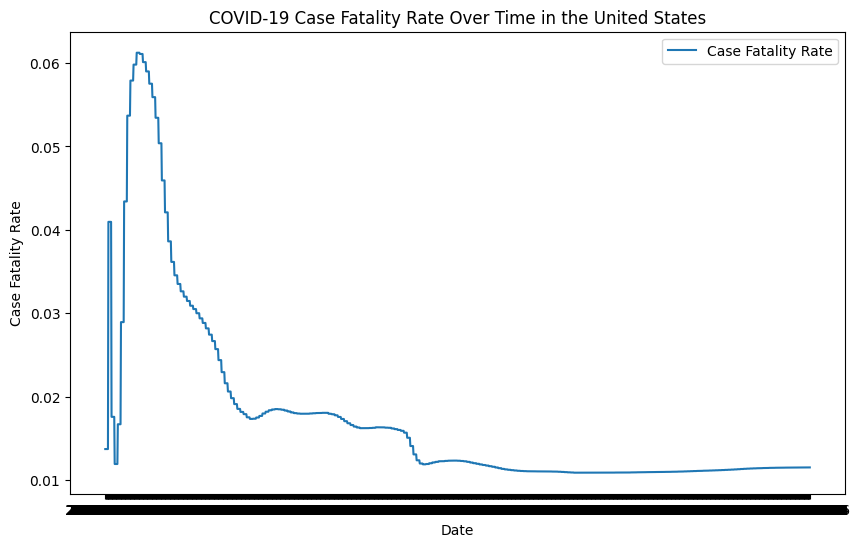

In [6]:
country_data = df_cleaned[df_cleaned['location'] == 'United States'].copy()

plt.figure(figsize=(10, 6))
plt.plot(country_data['date'], country_data['total_cases'], label='Total Cases')
plt.plot(country_data['date'], country_data['total_deaths'], label='Total Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Time in the United States')
plt.legend()
plt.show()

country_data.loc[:, 'case_fatality_rate'] = country_data['total_deaths'] / country_data['total_cases']

plt.figure(figsize=(10, 6))
plt.plot(country_data['date'], country_data['case_fatality_rate'], label='Case Fatality Rate')
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.title('COVID-19 Case Fatality Rate Over Time in the United States')
plt.legend()
plt.show()

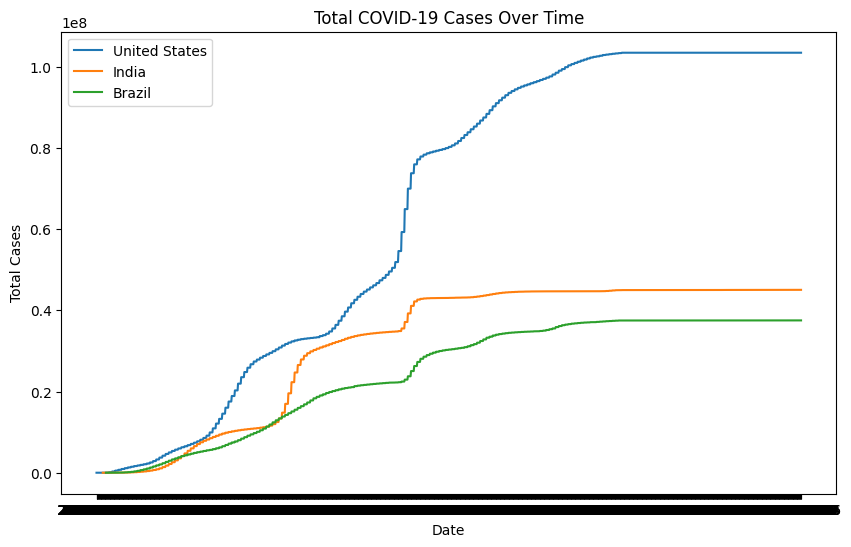

In [7]:
# Compare multiple countries
countries = ['United States', 'India', 'Brazil']
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.show()